In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [5]:
d=pd.read_csv('https://grantmlong.com/data/streeteasy_rents_june2016.csv')

In [6]:
d.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


(array([ 497., 1282., 1279.,  606.,  345.,  272.,  183.,  112.,   85.,
          76.,   55.,   31.,   37.,   35.,   40.,   14.,   14.,   18.,
           8.,   11.]),
 array([ 1250. ,  2187.5,  3125. ,  4062.5,  5000. ,  5937.5,  6875. ,
         7812.5,  8750. ,  9687.5, 10625. , 11562.5, 12500. , 13437.5,
        14375. , 15312.5, 16250. , 17187.5, 18125. , 19062.5, 20000. ]),
 <a list of 20 Patch objects>)

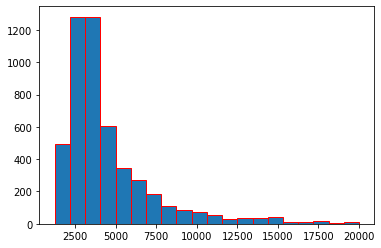

In [24]:
x='rent'
plt.hist(d[x],bins=20,edgecolor='red')

In [15]:
d.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
d.drop(['rental_id','building_id','neighborhood','submarket','borough'],inplace=True,axis=1)

In [26]:
s=d.corr()
s


,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rent,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302,-0.091769,0.081286,0.096136,0.099106,0.120822,0.096631,0.058260,0.093737
bedrooms,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329,-0.067047,-0.012395,-0.002582,-0.034031,-0.027457,-0.007094,0.003772,-0.018393
bathrooms,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050,-0.052726,0.044597,0.052827,0.044997,0.051410,0.060295,0.057091,0.057221
size_sqft,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434,-0.129534,0.038302,0.052746,0.046402,0.060830,0.063051,0.036600,0.047815
min_to_subway,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273,0.054977,-0.021765,-0.017840,-0.006722,-0.014314,-0.022058,-0.005652,-0.014924
floor,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757,0.088094,0.079554,0.060379,0.123108,0.109258,0.036979,0.068119,0.089361
building_age_yrs,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000,-0.213815,-0.055064,-0.031511,-0.058163,-0.067261,-0.040078,-0.048155,-0.063687
no_fee,-0.091769,-0.067047,-0.052726,-0.129534,0.054977,0.088094,-0.213815,1.000000,-0.089593,-0.082366,-0.175022,-0.155638,-0.086081,-0.052192,-0.105797
has_roofdeck,0.081286,-0.012395,0.044597,0.038302,-0.021765,0.079554,-0.055064,-0.089593,1.000000,0.331626,0.506101,0.535333,0.369123,0.145139,0.579826
has_washer_dryer,0.096136,-0.002582,0.052827,0.052746,-0.017840,0.060379,-0.031511,-0.082366,0.331626,1.000000,0.356328,0.410523,0.471480,0.159091,0.376372


In [28]:
g=d.corr(method='pearson')
g

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rent,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302,-0.091769,0.081286,0.096136,0.099106,0.120822,0.096631,0.058260,0.093737
bedrooms,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329,-0.067047,-0.012395,-0.002582,-0.034031,-0.027457,-0.007094,0.003772,-0.018393
bathrooms,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050,-0.052726,0.044597,0.052827,0.044997,0.051410,0.060295,0.057091,0.057221
size_sqft,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434,-0.129534,0.038302,0.052746,0.046402,0.060830,0.063051,0.036600,0.047815
min_to_subway,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273,0.054977,-0.021765,-0.017840,-0.006722,-0.014314,-0.022058,-0.005652,-0.014924
floor,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757,0.088094,0.079554,0.060379,0.123108,0.109258,0.036979,0.068119,0.089361
building_age_yrs,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000,-0.213815,-0.055064,-0.031511,-0.058163,-0.067261,-0.040078,-0.048155,-0.063687
no_fee,-0.091769,-0.067047,-0.052726,-0.129534,0.054977,0.088094,-0.213815,1.000000,-0.089593,-0.082366,-0.175022,-0.155638,-0.086081,-0.052192,-0.105797
has_roofdeck,0.081286,-0.012395,0.044597,0.038302,-0.021765,0.079554,-0.055064,-0.089593,1.000000,0.331626,0.506101,0.535333,0.369123,0.145139,0.579826
has_washer_dryer,0.096136,-0.002582,0.052827,0.052746,-0.017840,0.060379,-0.031511,-0.082366,0.331626,1.000000,0.356328,0.410523,0.471480,0.159091,0.376372


In [30]:
g1=g.unstack().sort_values()
g1

floor             building_age_yrs   -0.352757
building_age_yrs  floor              -0.352757
no_fee            building_age_yrs   -0.213815
building_age_yrs  no_fee             -0.213815
has_doorman       no_fee             -0.175022
                                        ...   
size_sqft         size_sqft           1.000000
bathrooms         bathrooms           1.000000
bedrooms          bedrooms            1.000000
has_patio         has_patio           1.000000
has_gym           has_gym             1.000000
Length: 225, dtype: float64

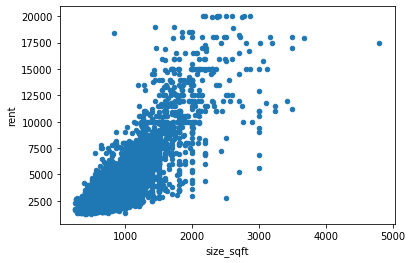

In [32]:
d.plot.scatter('size_sqft','rent')

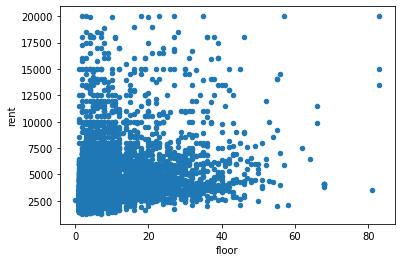

In [33]:
d.plot.scatter('floor','rent')# bathrooms , and floor

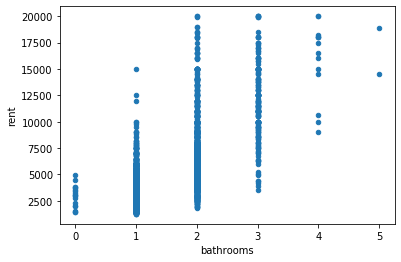

In [34]:
d.plot.scatter('bathrooms','rent')

In [35]:
d.corr()['rent']['bathrooms']

0.7336443859581325

In [36]:
d.corr()['rent']['floor']

0.27235110961903614

In [37]:
d.corr()['rent']['size_sqft']

0.8087835060658338

In [38]:
slop, incpt = np.polyfit(d.size_sqft,d.rent, 1)

print('slop: %0.3f, incpt: %0.1f.' % (slop, incpt))

slop: 5.384, incpt: -416.6.


In [41]:
#cost of 700sq ft aprtmnt
c=(slop*700+incpt)
c

3351.977210435987

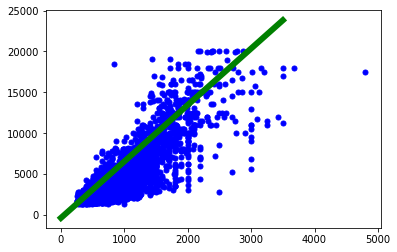

In [42]:
plt.plot(d.size_sqft,d.rent,color='blue',marker='.',markersize=10,linestyle='none')
plt.plot([0,3500],[incpt,slop*4500+incpt],color='green',linewidth=6)

In [43]:
d['Rent_predicted']=slop*d['rent']+incpt
d['rent_residual']=d['Rent_predicted']-d['rent']

In [44]:
d[['Rent_predicted','rent']]

,Rent_predicted,rent
0,13311.685057,2550
1,61495.136533,11500
2,15734.316696,3000
3,23809.755491,4500
4,25397.925120,4795
...,...,...
4995,13850.047644,2650
4996,35519.141743,6675
4997,8730.219448,1699
4998,18291.538981,3475


(array([ 360.,  866., 1085.,  869.,  484.,  289.,  242.,  170.,  137.,
          74.,   71.,   70.,   37.,   40.,   29.,   33.,   25.,   22.,
          32.,   14.,   11.,    9.,   14.,    6.,   11.]),
 array([  6312.97143519,  10350.69083258,  14388.41022997,  18426.12962736,
         22463.84902476,  26501.56842215,  30539.28781954,  34577.00721693,
         38614.72661432,  42652.44601171,  46690.1654091 ,  50727.8848065 ,
         54765.60420389,  58803.32360128,  62841.04299867,  66878.76239606,
         70916.48179345,  74954.20119084,  78991.92058824,  83029.63998563,
         87067.35938302,  91105.07878041,  95142.7981778 ,  99180.51757519,
        103218.23697258, 107255.95636998]),
 <a list of 25 Patch objects>)

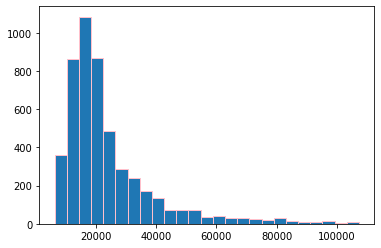

In [48]:
plt.hist(d['Rent_predicted'],edgecolor='pink',bins=25)

In [50]:
lm=LinearRegression()


In [55]:
c=['bedrooms','bathrooms','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_elevator','has_doorman','has_dishwasher','has_patio','has_gym']

In [57]:
X=d[c]
lm.fit(X,d.rent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print("intercept=",lm.intercept_)
print("No of coefficients=",len(lm.coef_))

intercept= -515.504036081019
No of coefficients= 13


In [59]:
pd.DataFrame(lm.coef_,index=c,columns=['Estimated coefficients'])

,Estimated coefficients
bedrooms,417.730687
bathrooms,3171.816130
min_to_subway,-22.630204
floor,49.132507
building_age_yrs,-1.488370
no_fee,-344.120712
has_roofdeck,-4.475219
has_washer_dryer,191.475476
has_elevator,400.797299
has_doorman,-41.004582


In [60]:
d['Predicted_value']=lm.predict(X)

d[['rent','Predicted_value']]

,rent,Predicted_value
0,2550,2629.064883
1,11500,6479.317777
2,3000,3710.348635
3,4500,5994.052572
4,4795,3764.126005
...,...,...
4995,2650,2718.315156
4996,6675,7282.301113
4997,1699,2713.830709
4998,3475,3421.494926


Text(0, 0.5, 'frequency')

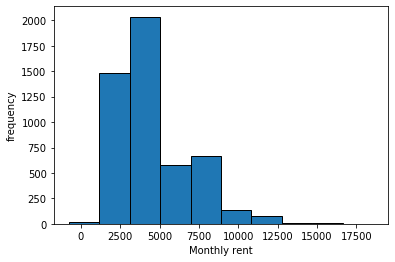

In [61]:
plt.hist(d['Predicted_value'],edgecolor='black')
plt.xlabel('Monthly rent')
plt.ylabel('frequency')

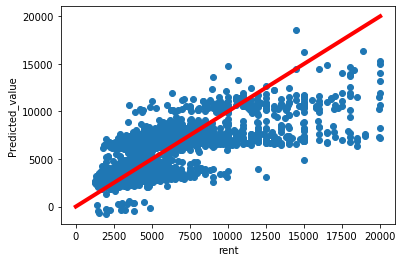

In [62]:
plt.scatter(d['rent'],d['Predicted_value'])
plt.xlabel("rent")
plt.ylabel("Predicted_value")
plt.plot([0,20000],[0,20000],linewidth=4,color='red')

In [63]:
#rss
print('%0.2f'% np.sum((d['rent']-lm.predict(X))**2))

17730479762.04
